In [ ]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 36.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
from ortools.linear_solver import pywraplp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import DateOffset
import random as rand

# Functions that produce a value of satisfaction of stakeholders

In [ ]:
# 75.5  threshold for still water to flood along the South shoreline of Lake Ontario
# 74.4-75.45 preferred boating range

In [ ]:
def line_solver(x_1, y_1, x_2, y_2):
    m = (y_2 - y_1) / (x_2 - x_1)
    return m

In [ ]:
august_prev = line_solver(73.76, 21.75, 74.68, 0.0)
sept_prev = line_solver(73.76, 15.8,74.68,0.0)
may_prev = line_solver(73.76, 8.75,74.68,0.0)
oct_prev = line_solver(73.76, 7.5,74.68,0.0)
april_prev = line_solver(73.76, 3.75,74.68,0.0)
nov_prev = line_solver(73.76, 2.5,74.68,0.0)
june_prev = may_prev
july_prev = august_prev

august_after = line_solver(75.35, 0.0, 75.9, 6.7)
sept_after = line_solver(75.35, 0.0,75.9, 5)
oct_after = line_solver(75.35, 0.0,75.9, 2.5)
may_after = line_solver(75.35, 0.0,75.9, 2.5)
april_after = line_solver(75.35, 0.0,75.9, 1.0)
nov_after = line_solver(75.35, 0.0,75.9, 1.0)
june_after = may_after
july_after = august_after
print((74.68 - 75) * august_prev+(75.35-75)*august_after)


11.82885375494038


In [ ]:
def house_owner1(wl):
  return (75.5 - wl) * 10
def house_owner2(wl):
  return (wl - 73.5) * 7

In [ ]:
# different months can have different factors
# fcts = np.arange(7.0, 10.0, 0.5).tolist() + np.arange(, 10.7, 0.1).tolist()
# print(len(fcts))
# def boating_1(wl, month):
#   return (75 - wl) * fcts[month - 1]
# def boating_2(wl, month):
#   return (wl - 74) * fcts[month - 1]

In [ ]:
def boating_1(wl, month):
  if month == 8:
    return (74.68 - wl) * august_prev
  if month == 9:
    return (74.68 - wl) * sept_prev
  if month == 10:
    return (74.68 - wl) * oct_prev
  if month == 5:
    return (74.68 - wl) * may_prev
  if month == 4:
    return (74.68 - wl) * april_prev
  if month == 11:
    return (74.68 - wl) * nov_prev
  if month == 6:
    return (74.68 - wl) * june_prev
  if month == 7:
    return (74.68 - wl) * july_prev
  return (74.68 - wl) * 10


def boating_2(wl, month):
  if month == 8:
    return (75.35 - wl) * august_after
  if month == 9:
    return (75.35 - wl) * sept_after
  if month == 10:
    return (75.35 - wl) * oct_after
  if month == 5:
    return (75.35 - wl) * may_after
  if month == 4:
    return (75.35 - wl) * april_after
  if month == 11:
    return (75.35 - wl) * nov_after
  if month == 6:
    return (75.35 - wl) * june_after
  if month == 7:
    return (75.35 - wl) * july_after
  return (75.35 - wl) * 10

In [ ]:
a = boating_1(75, 4)
print(a)

1.3043478260869261


In [ ]:
power_cap = (912.0 + 1045.0) * 10.0
Q_arr = []
def hydropower(wl, month):
  Q = 0.104 # Can be predicted by month
  g = 9.8
  return 0.9 * Q * g * (wl - 75.3)

In [ ]:
def navigation(wl):

  return (wl - 74.8) * 10

In [ ]:
def envir(wl, month):
  return 0

In [ ]:
months = [i + 1 for i in range(12)]

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d

<ipython-input-27-4acf63f28833>:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [ ]:
# Constants in the constraints can be replaced by functions in the previous section

def Optwl(months):
  z_arr = []
  sol = []
  for month in months:
      """Linear programming sample."""
      # Instantiate a Glop solver, naming it LinearExample.
      solver = pywraplp.Solver.CreateSolver("GLOP")
      if not solver:
          return

      # Water level
      wl = solver.NumVar(0, solver.infinity(), "water level")
      # y = solver.NumVar(0, solver.infinity(), "y")

      # print("Number of variables =", solver.NumVariables())

      # Constraints of water level:
      solver.Add(wl >= 74.0)
      solver.Add(wl <= 76.0)

      # Constraints of house owners:
      solver.Add(house_owner1(wl) >= -1.0)
      solver.Add(house_owner2(wl) >= -10)
      print(month)
      # Constraints of boaters:
      # solver.Add(boating_1(wl, month) <= 7)
      # solver.Add(boating_2(wl, month) <= 7)

      # Constraints of hydropower stations:
      solver.Add(hydropower(wl, 1) <= power_cap)
      # solver.Add(hydropower(wl, 1) >= 30)

      # Constraints of shipping:
      solver.Add(navigation(wl) >= -7)

      # print("Number of constraints =", solver.NumConstraints())

      # Objective function:
      solver.Maximize(0.3 * house_owner1(wl) + 0.1 * house_owner2(wl) + 0.3 * hydropower(wl, 1) + 0.2 * navigation(wl) + 0.1 * (boating_1(wl, month) + boating_2(wl, month)))

      # Solve the system.
      # print(f"Solving with {solver.SolverVersion()}")
      status = solver.Solve()

      if status == pywraplp.Solver.OPTIMAL:
          # print("Solution:")
          # print(f"Objective value = {solver.Objective().Value()}")
          # print(f"Water level = {wl.solution_value()}m")
          #print(f"y = {y.solution_value()}")
          z_arr.append(solver.Objective().Value())
          sol.append(wl.solution_value())
      else:
          print("The problem does not have an optimal solution.")
          continue
  print(f'Objective values: {z_arr}')
  # sol = [x + rand.uniform(0, 0.2) for x in sol]
  sol = gaussian_filter1d(sol, sigma=1.2)
  print(f'Water levels: {sol}')
    # print("\nAdvanced usage:")
    # print(f"Problem solved in {solver.wall_time():d} milliseconds")
    # print(f"Problem solved in {solver.iterations():d} iterations")
  return z_arr, sol

In [ ]:
z_arr, sol = Optwl(months)

1
2
3
4
5
6
7
8
9
10
11
12
Objective values: [4.719779200000033, 4.719779200000033, 4.719779200000033, 3.182100654545467, 3.613918836363638, 3.613918836363638, 4.723009745454519, 4.723009745454519, 4.205282472727262, 3.4889188363636485, 3.0571006545454686, 4.719779200000033]
Water levels: [74.12593555 74.24835443 74.60066045 75.09933955 75.45173028 75.57607701
 75.59790274 75.59790274 75.57616172 75.45374283 75.12326254 74.74893017]


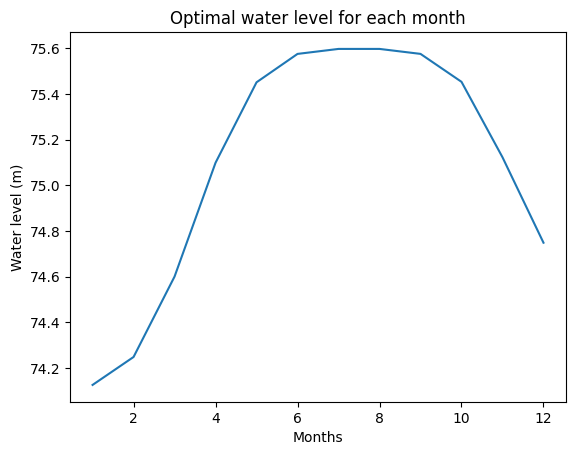

In [ ]:
plt.plot(months, sol)
plt.title('Optimal water level for each month')
plt.xlabel('Months')
plt.ylabel('Water level (m)')
plt.show()